<a href="https://www.kaggle.com/code/ibrahimawad02/fifa-clustering?scriptVersionId=142474870" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Using Clustering methods on FIFA 18 sample data
<div class="alert alert-block alert-info" style="font-size:24px; font-family:arial;">
    Presented by Ibrahim Hossam
</div>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/kaggle/input/fifa-18-sample-data/fifa_18_sample_data.csv")
df

,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,...,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,...,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,...,False,False,False,False,False,False,False,False,False,False
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,2100,25,French Ligue 1,1992-02-05,175.0,...,False,False,False,False,False,False,False,False,False,False
3,176580,L. Suárez,Luis Suárez,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2291,30,Spanish Primera División,1987-01-24,182.0,...,False,False,False,False,False,False,False,False,False,False
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,1493,31,German Bundesliga,1986-03-27,193.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,Martín Montoya Torralbo,Valencia CF,https://cdn.sofifa.org/18/teams/461.png,2040,26,Spanish Primera División,1991-04-14,175.0,...,False,True,False,False,False,False,False,False,False,False
996,160087,L. Dalsaro,Lucas Dalsaro,Colo-Colo,https://cdn.sofifa.org/18/teams/110980.png,2009,25,Chilian Primera División,1992-02-29,187.0,...,False,False,False,False,False,False,False,False,False,False
997,31831,K. Källström,Kim Källström,Djurgårdens IF,https://cdn.sofifa.org/18/teams/710.png,2005,34,Swedish Allsvenskan,1982-08-24,185.0,...,False,False,False,False,False,False,False,False,False,False
998,204120,T. Vaclík,Tomáš Vaclík,FC Basel,https://cdn.sofifa.org/18/teams/896.png,1206,28,Swiss Super League,1989-03-29,188.0,...,False,False,False,False,False,False,False,False,False,True


In [3]:
df.drop('club_logo', axis = 1, inplace = True)

In [4]:
df.columns.to_list()


['ID',
 'name',
 'full_name',
 'club',
 'special',
 'age',
 'league',
 'birth_date',
 'height_cm',
 'weight_kg',
 'body_type',
 'real_face',
 'flag',
 'nationality',
 'photo',
 'eur_value',
 'eur_wage',
 'eur_release_clause',
 'overall',
 'potential',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 'international_reputation',
 'skill_moves',
 'weak_foot',
 'work_rate_att',
 'work_rate_def',
 'preferred_foot',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'rs',
 'rw',
 'rf',
 'ram',
 'rcm',
 'rm',
 'rdm',
 'rcb',
 'rb',
 '

In [5]:
preferred_position_columns = ['prefers_rs',
 'prefers_rw',
 'prefers_rf',
 'prefers_ram',
 'prefers_rcm',
 'prefers_rm',
 'prefers_rdm',
 'prefers_rcb',
 'prefers_rb',
 'prefers_rwb',
 'prefers_st',
 'prefers_lw',
 'prefers_cf',
 'prefers_cam',
 'prefers_cm',
 'prefers_lm',
 'prefers_cdm',
 'prefers_cb',
 'prefers_lb',
 'prefers_lwb',
 'prefers_ls',
 'prefers_lf',
 'prefers_lam',
 'prefers_lcm',
 'prefers_ldm',
 'prefers_lcb',
 'prefers_gk']   #all relevant position columns

In [6]:
def extract_true_preferred_position(row):
    for column in preferred_position_columns:
        if row[column] == True:
            return column
    return None  # Return None if no true preferred position is found

df['True_Preferred_Position'] = df.apply(extract_true_preferred_position, axis=1)
df

,ID,name,full_name,club,special,age,league,birth_date,height_cm,weight_kg,...,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk,True_Preferred_Position
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,...,False,False,False,False,False,False,False,False,False,prefers_st
1,158023,L. Messi,Lionel Messi,FC Barcelona,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,...,False,False,False,False,False,False,False,False,False,prefers_rw
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,2100,25,French Ligue 1,1992-02-05,175.0,68.0,...,False,False,False,False,False,False,False,False,False,prefers_lw
3,176580,L. Suárez,Luis Suárez,FC Barcelona,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,...,False,False,False,False,False,False,False,False,False,prefers_st
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,1493,31,German Bundesliga,1986-03-27,193.0,92.0,...,False,False,False,False,False,False,False,False,True,prefers_gk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,Martín Montoya Torralbo,Valencia CF,2040,26,Spanish Primera División,1991-04-14,175.0,73.0,...,True,False,False,False,False,False,False,False,False,prefers_rb
996,160087,L. Dalsaro,Lucas Dalsaro,Colo-Colo,2009,25,Chilian Primera División,1992-02-29,187.0,85.0,...,False,False,False,False,False,False,False,False,False,prefers_cm
997,31831,K. Källström,Kim Källström,Djurgårdens IF,2005,34,Swedish Allsvenskan,1982-08-24,185.0,83.0,...,False,False,False,False,False,False,False,False,False,prefers_cm
998,204120,T. Vaclík,Tomáš Vaclík,FC Basel,1206,28,Swiss Super League,1989-03-29,188.0,85.0,...,False,False,False,False,False,False,False,False,True,prefers_gk


In [7]:
df.drop(preferred_position_columns, axis = 1, inplace = True)
df

,ID,name,full_name,club,special,age,league,birth_date,height_cm,weight_kg,...,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,True_Preferred_Position
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,...,False,True,False,False,False,False,True,False,True,prefers_st
1,158023,L. Messi,Lionel Messi,FC Barcelona,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,...,False,False,False,True,False,False,True,False,True,prefers_rw
2,190871,Neymar,Neymar da Silva Santos Jr.,Paris Saint-Germain,2100,25,French Ligue 1,1992-02-05,175.0,68.0,...,False,False,False,False,False,False,True,False,False,prefers_lw
3,176580,L. Suárez,Luis Suárez,FC Barcelona,2291,30,Spanish Primera División,1987-01-24,182.0,86.0,...,False,False,False,False,False,False,True,False,True,prefers_st
4,167495,M. Neuer,Manuel Neuer,FC Bayern Munich,1493,31,German Bundesliga,1986-03-27,193.0,92.0,...,False,False,False,False,False,False,False,False,False,prefers_gk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,194644,Montoya,Martín Montoya Torralbo,Valencia CF,2040,26,Spanish Primera División,1991-04-14,175.0,73.0,...,False,False,False,False,False,False,False,False,False,prefers_rb
996,160087,L. Dalsaro,Lucas Dalsaro,Colo-Colo,2009,25,Chilian Primera División,1992-02-29,187.0,85.0,...,False,False,False,False,False,False,False,True,False,prefers_cm
997,31831,K. Källström,Kim Källström,Djurgårdens IF,2005,34,Swedish Allsvenskan,1982-08-24,185.0,83.0,...,False,False,False,False,False,False,False,False,False,prefers_cm
998,204120,T. Vaclík,Tomáš Vaclík,FC Basel,1206,28,Swiss Super League,1989-03-29,188.0,85.0,...,False,False,False,False,False,False,False,False,False,prefers_gk


In [8]:
label_encoder = LabelEncoder()

In [9]:
df['True_Preferred_Position'] = label_encoder.fit_transform(df['True_Preferred_Position'])

In [10]:
x = df.loc[:,['True_Preferred_Position', 'eur_wage']].values
x

array([[1.20e+01, 5.65e+05],
       [1.10e+01, 5.65e+05],
       [8.00e+00, 2.80e+05],
       ...,
       [4.00e+00, 9.00e+03],
       [5.00e+00, 3.20e+04],
       [1.10e+01, 5.20e+04]])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Cost_Function= 3844403393546.5444 with 1 Clusters
Cost_Function= 1548898981620.4487 with 2 Clusters
Cost_Function= 847228737281.5438 with 3 Clusters
Cost_Function= 541065421457.9824 with 4 Clusters
Cost_Function= 319203351121.3886 with 5 Clusters
Cost_Function= 209108083691.25723 with 6 Clusters
Cost_Function= 154758368525.65152 with 7 Clusters


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cost_Function= 117573547434.7175 with 8 Clusters
Cost_Function= 92526654902.58987 with 9 Clusters
Cost_Function= 74597374365.55505 with 10 Clusters


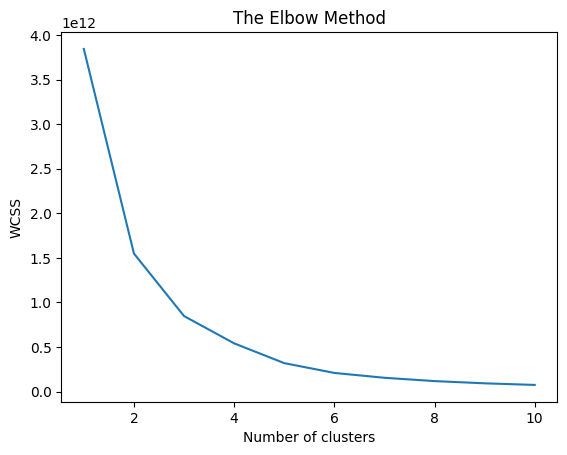

In [11]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []            ## total distances from the centeriods
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x)
    print('Cost_Function=',kmeans.inertia_,'with', i, 'Clusters')
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

- <span style = 'font-size:18px;'> I will use 5 clusters using the elbow method although it is more logic to use 4 because in football there is 4 groups of GK, DF, CM, and FD.

In [12]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 49)
y_kmeans = kmeans.fit_predict(x)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


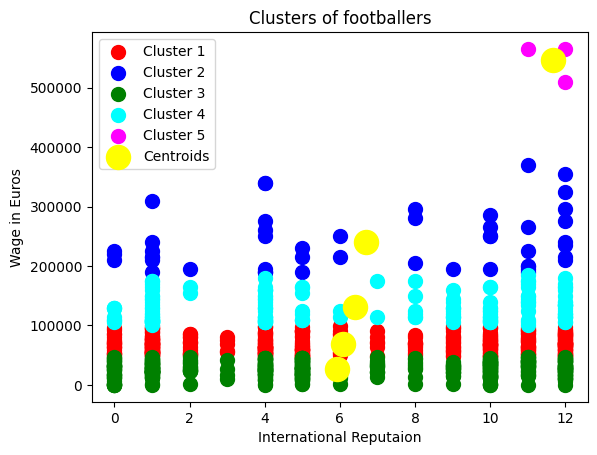

In [13]:
# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of footballers')
plt.xlabel('International Reputaion')
plt.ylabel('Wage in Euros')
plt.legend()
plt.show()

# Hierarchal Clustering

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

### Different linkage methods
- <span style = 'font-size:18px;'> Single Linkage.    
- <span style = 'font-size:18px;'> Average Linkage.    
- <span style = 'font-size:18px;'> Complete Linkage.    
- <span style = 'font-size:18px;'> Ward's Linkage.    
- <span style = 'font-size:18px;'> Centroid Linkage (UPGMA).

In [15]:
SC = StandardScaler()

In [16]:
xc = SC.fit_transform(x)

In [17]:
linked = linkage(xc, method='single')

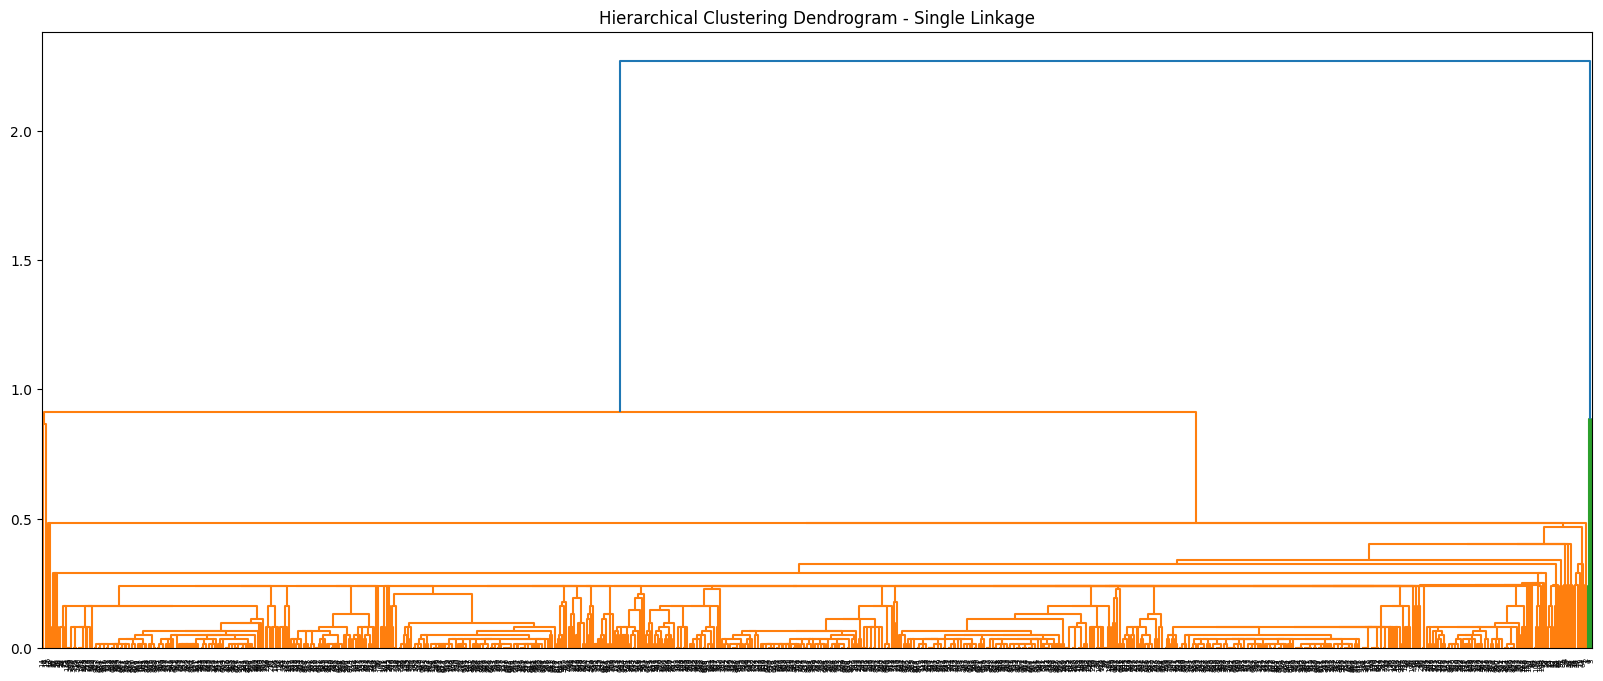

In [18]:
plt.figure(figsize=(20, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram - Single Linkage')
plt.show()

In [19]:
linked = linkage(xc, method='average')

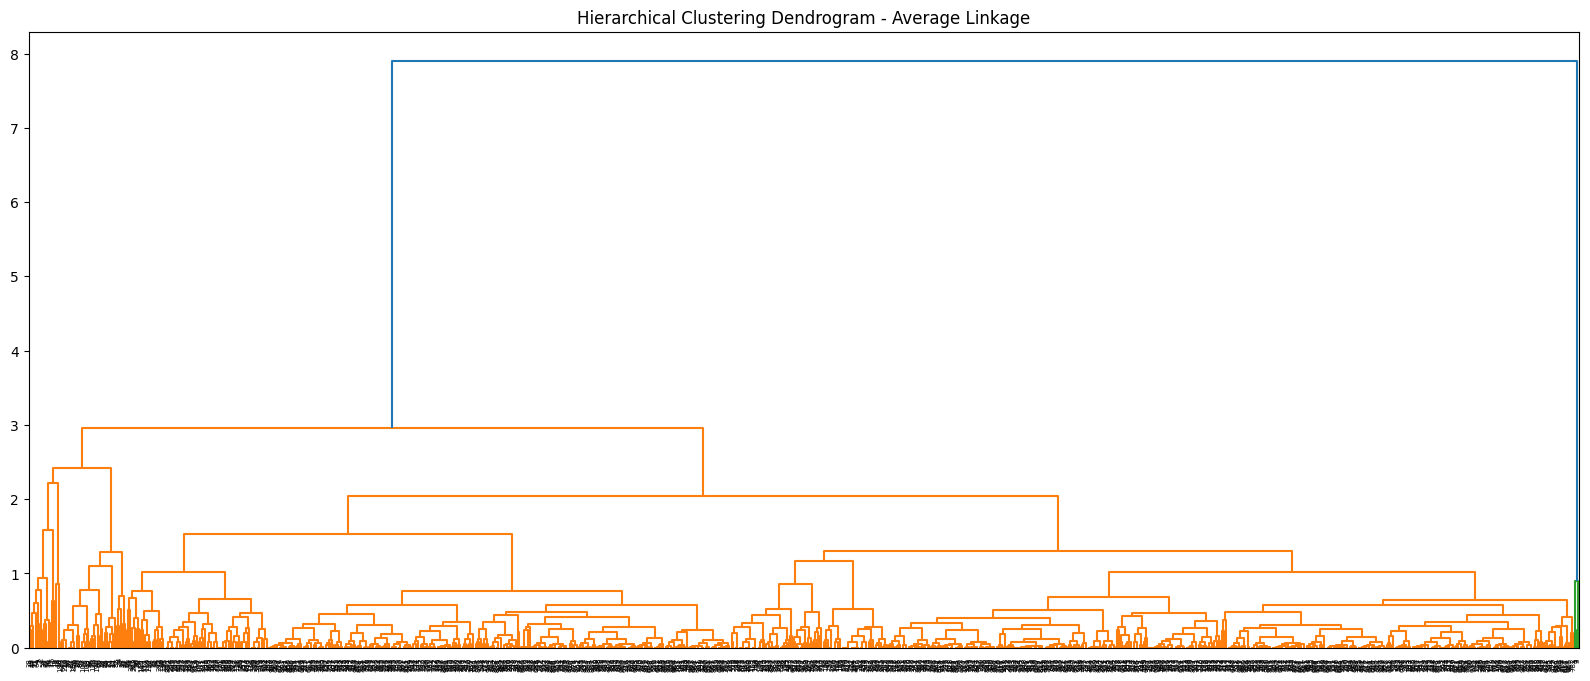

In [20]:
plt.figure(figsize=(20, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram - Average Linkage')
plt.show()

In [21]:
linked = linkage(xc, method='complete')

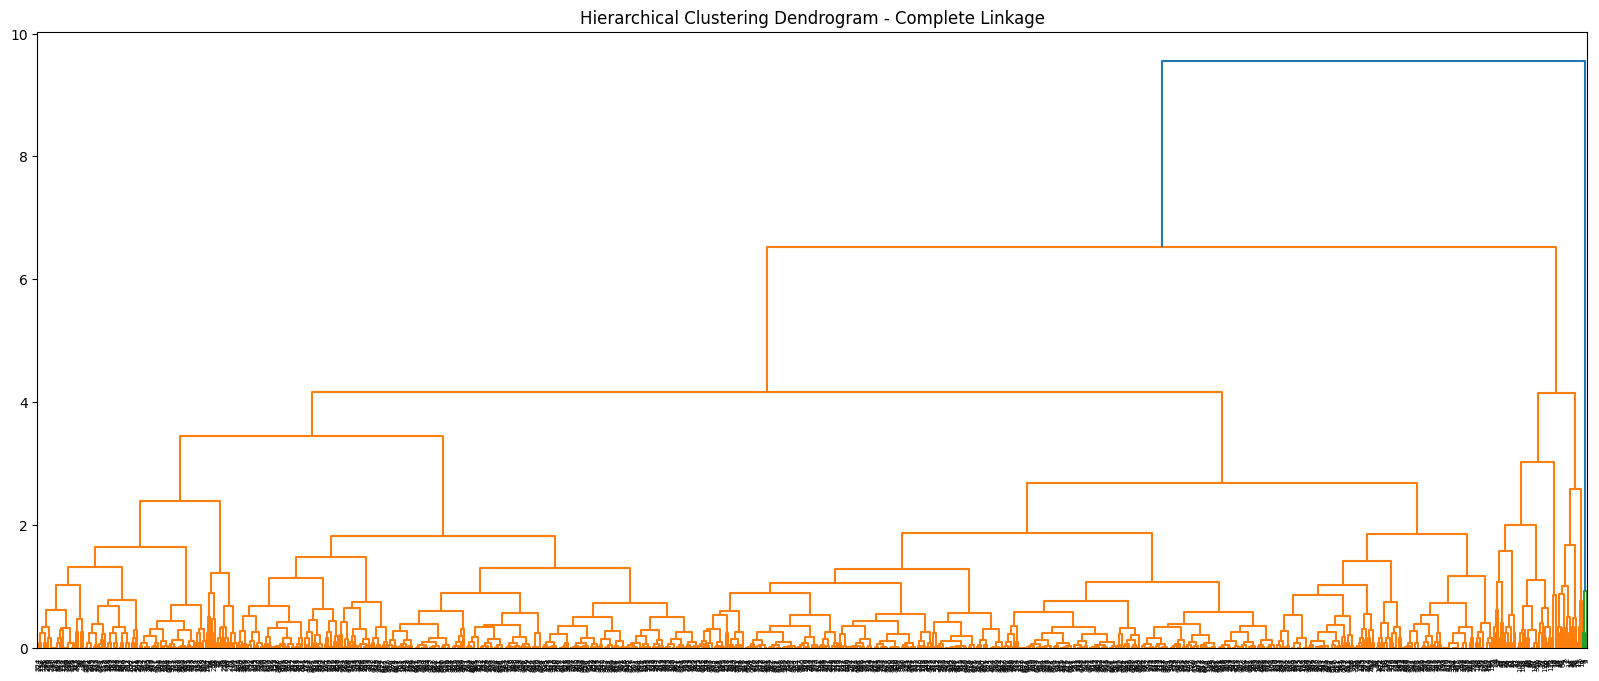

In [22]:
plt.figure(figsize=(20, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram - Complete Linkage')
plt.show()

In [23]:
linked = linkage(xc, method='ward')

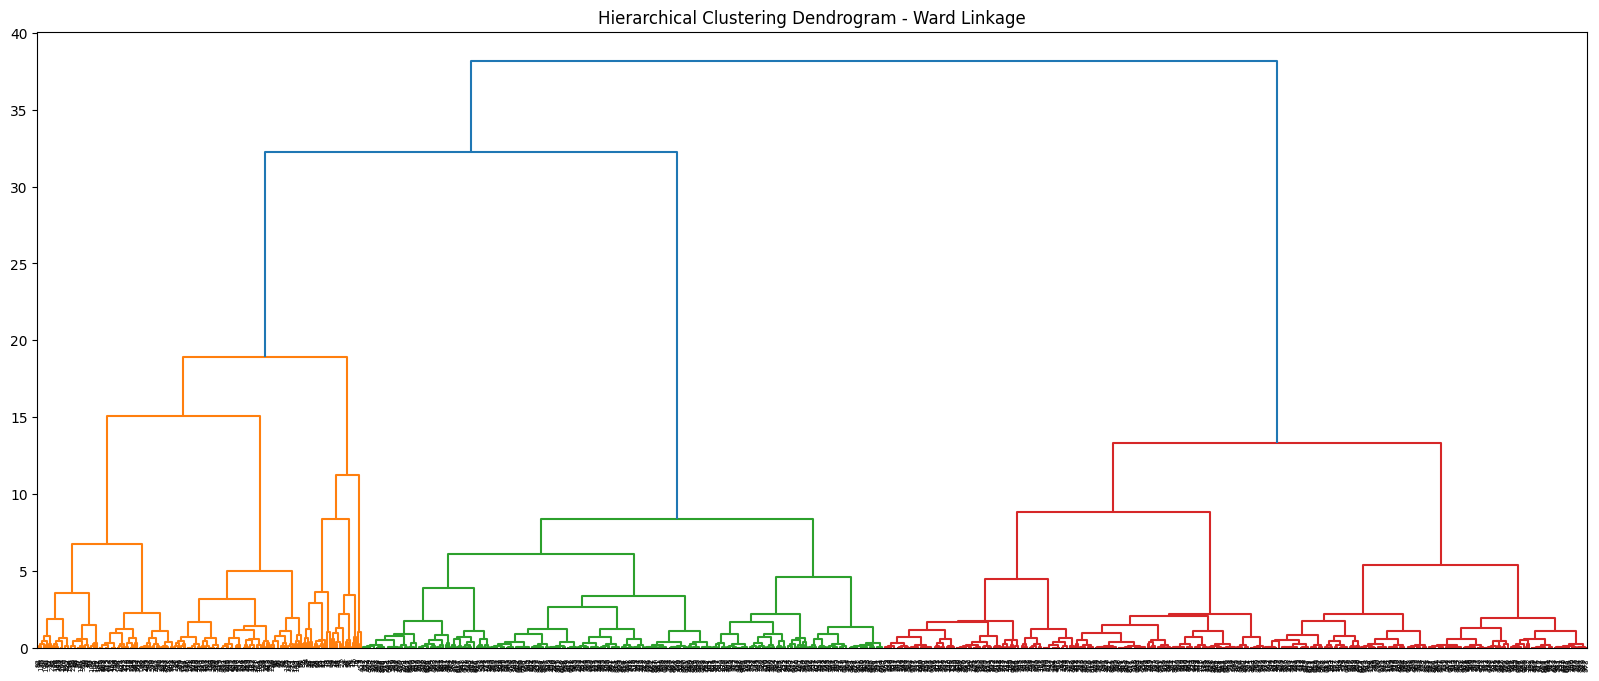

In [24]:
plt.figure(figsize=(20, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram - Ward Linkage')
plt.show()

In [25]:
linked = linkage(xc, method='centroid')

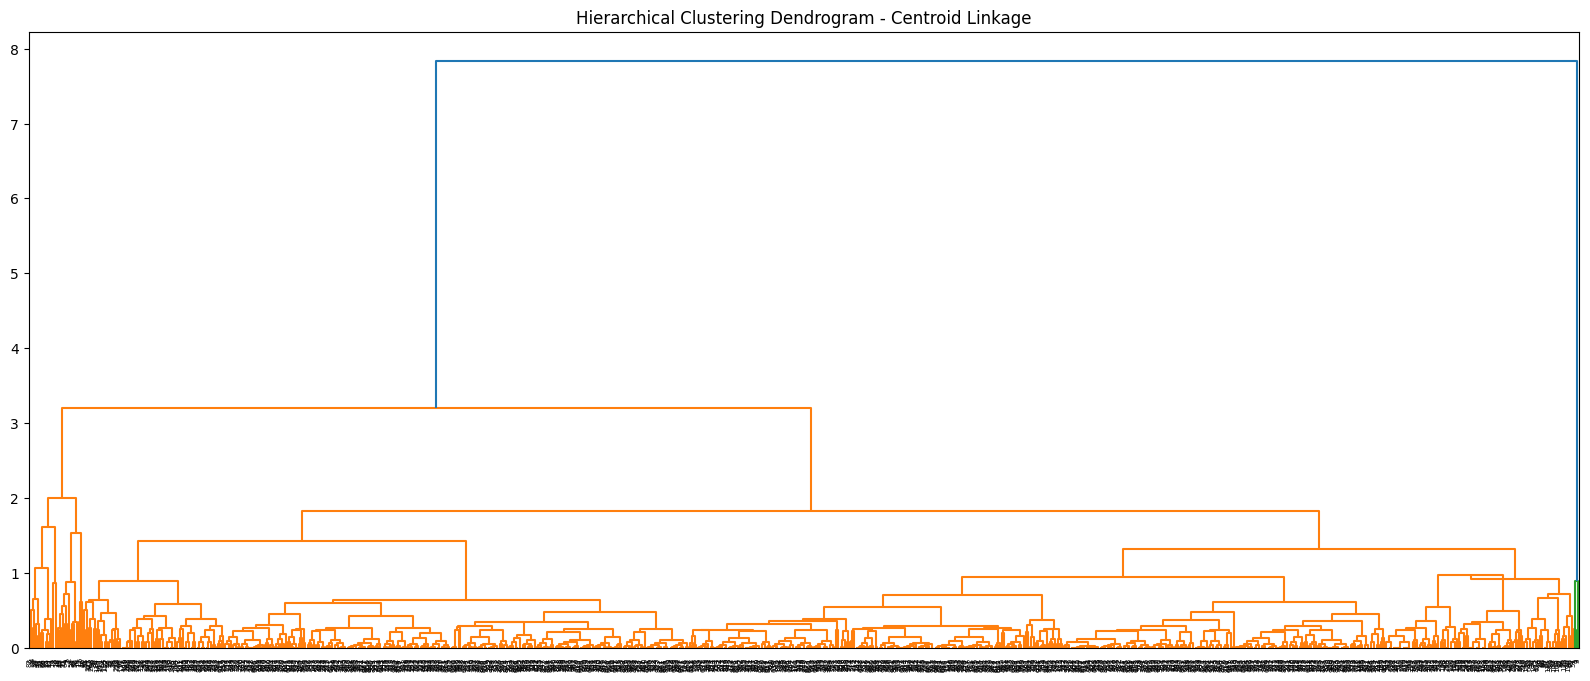

In [26]:
plt.figure(figsize=(20, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram - Centroid Linkage')
plt.show()

***
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#231855;
           font-size:20px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            <b>Thanks For Reading</b>
        </p>
</div>